In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터를 불러옵니다.
base_path = '../../data/'
# train_df = pd.read_csv(base_path + 'train.csv', index_col='id')
# test_df = pd.read_csv(base_path + 'test.csv', index_col='id')
train_df = pd.read_csv(base_path + 'train_f1.csv', index_col='id')
test_df = pd.read_csv(base_path + 'test_f1.csv', index_col='id')
submission_df = pd.read_csv(base_path + 'sample_submission.csv', index_col='id')

In [3]:
data_path='../../data/'
ambrosm_oof_df = pd.read_csv(data_path+'oof/ambrosm.csv',index_col='id')
lightgbm_oof_df = pd.read_csv(data_path+'oof/lightgbm.csv', index_col='id')
xgboost_oof_df = pd.read_csv(data_path+'oof/xgboost.csv', index_col='id')

In [4]:
# https://www.kaggle.com/code/yantxx/xgboost-binary-classifier-machine-failure
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

def show_confusion_roc(oof, title='Model Evaluation Results'):
    f, ax = plt.subplots(1, 2, figsize=(13.3, 4))
    df = pd.DataFrame(np.stack([oof[0], oof[1]]), index=['preds', 'target']).T
    cm = confusion_matrix(df.target, df.preds.ge(0.5).astype(int))
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='GnBu_r', ax=ax[0])
    ax[0].grid(False)
    RocCurveDisplay.from_predictions(df.target, df.preds, ax=ax[1])
    plt.suptitle(f'{title}', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.grid()

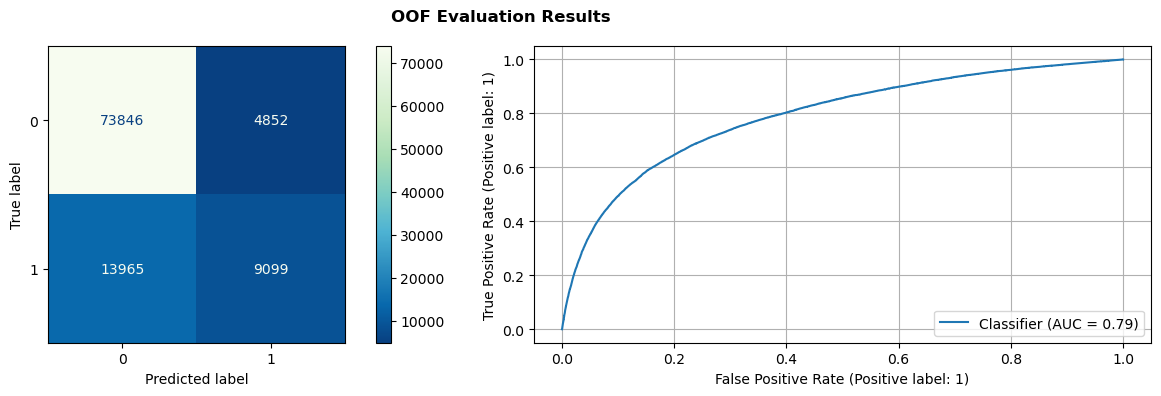

In [5]:
show_confusion_roc(oof=[xgboost_oof_df.to_numpy().reshape(-1), train_df[['defects']].to_numpy().reshape(-1)], title='OOF Evaluation Results')

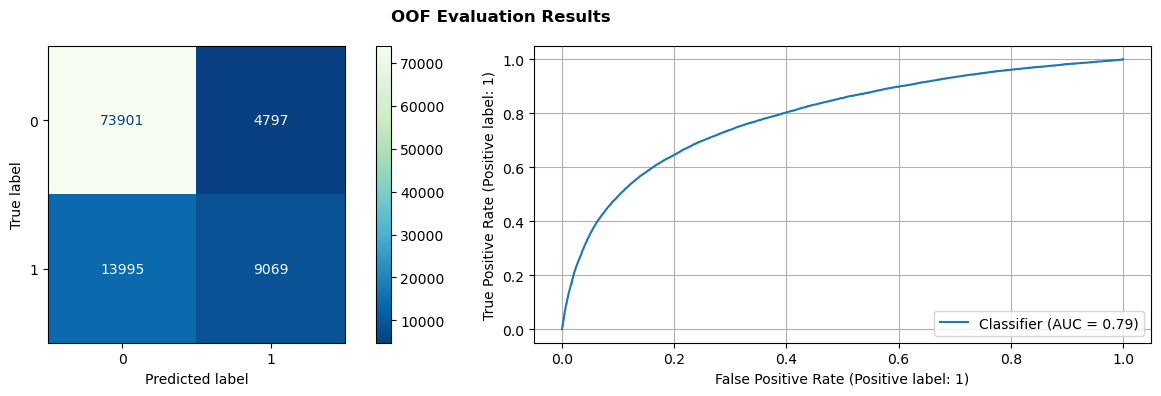

In [6]:
show_confusion_roc(oof=[lightgbm_oof_df.to_numpy().reshape(-1), train_df[['defects']].to_numpy().reshape(-1)], title='OOF Evaluation Results')

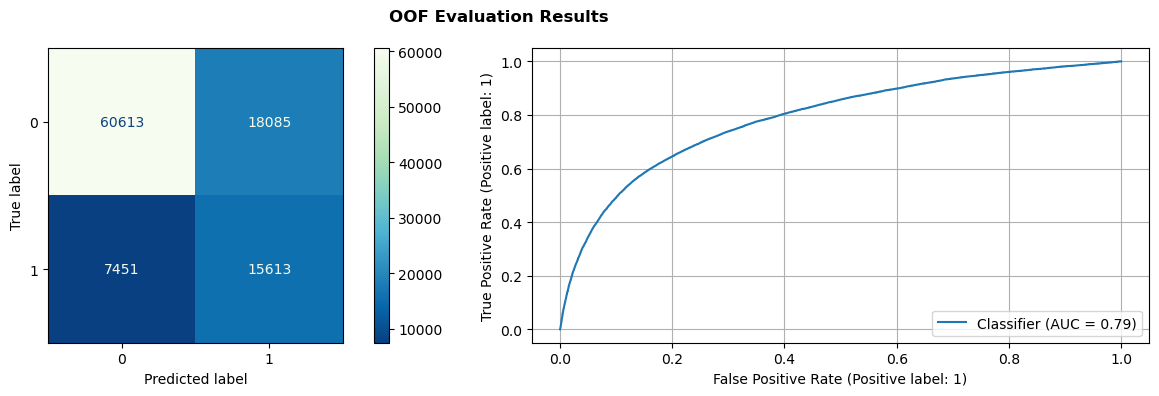

In [8]:
show_confusion_roc(oof=[ambrosm_oof_df.iloc[:, 1].to_numpy().reshape(-1), train_df[['defects']].to_numpy().reshape(-1)], title='OOF Evaluation Results')

In [5]:
xgboost_oof_df

,xgboost_oof
0,0.082412
1,0.048766
2,0.044623
3,0.098454
4,0.097552
...,...
101758,0.070794
101759,0.145696
101760,0.140195
101761,0.036700


In [10]:
train[['defects']]

,defects
0,False
1,False
2,False
3,True
4,False
...,...
101758,False
101759,False
101760,False
101761,False
